# Download data from FRED

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

* you need to get a FRED api key from [here](https://fred.stlouisfed.org/docs/api/api_key.html)

In [2]:
from fredapi import Fred

In [5]:
fred = Fred(api_key="your_fred_api_key")

From [FRED](https://fred.stlouisfed.org/)


* Real Gross Domestic Product (ND000334Q)
    Units:
    Billions of Chained 2012 Dollars,
    Not Seasonally Adjusted

from [unadjusted](https://fred.stlouisfed.org/series/ND000334Q)


* Real Gross Domestic Product (GDPC1)
    Billions of Chained 2012 Dollars,
    Seasonally Adjusted Annual Rate

from [adjusted](https://fred.stlouisfed.org/series/GDPC1)

In [43]:
gdp_adj = "GDPC1"
gdp_unadj = "ND000334Q"

In [44]:
data = {}
for s in [gdp_unadj, gdp_adj]:
    d = fred.get_series(s)
    data[s] = d

In [51]:
df = pd.DataFrame(data).dropna(axis=0, how='any')

<AxesSubplot:>

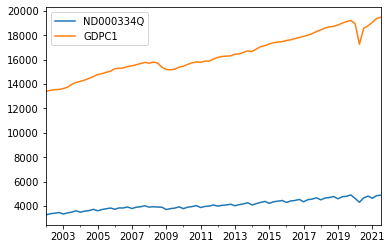

In [52]:
df.plot()

In [13]:
data = fred.get_series("GDPC1")

In [36]:
data = fred.get_series()

In [37]:
df = pd.DataFrame(data=data, columns=['GDPC1'])

In [38]:
df['log_GDP'] = np.log(data)

In [39]:
df['dGDP'] = df['log_GDP'].diff() * 100

In [40]:
df['growth_rate_GDP'] = df['GDPC1'].pct_change(1)*100

<AxesSubplot:>

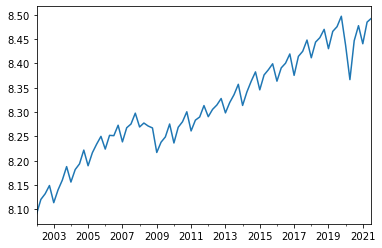

In [42]:
df['log_GDP'].plot()

<AxesSubplot:>

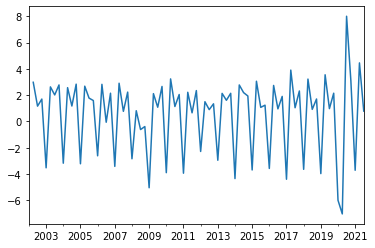

In [41]:
df['dGDP'].plot()

<AxesSubplot:>

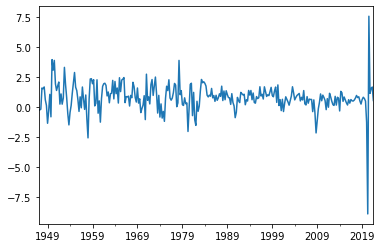

In [35]:
df['growth_rate_GDP'].plot()

In [8]:
data = fred.get_series_first_release('GDPC1')
data.tail()

date
2020-07-01    18583.984
2020-10-01    18780.325
2021-01-01    19087.568
2021-04-01    19358.176
2021-07-01    19465.195
Name: value, dtype: object

In [9]:
data = fred.get_series_latest_release('GDPC1')
data.tail()

2020-07-01    18560.774
2020-10-01    18767.778
2021-01-01    19055.655
2021-04-01    19368.310
2021-07-01    19469.398
dtype: float64

In [10]:
data=fred.get_series_as_of_date('GDP', '6/1/2014')

In [11]:
data

,realtime_start,date,value
0,1992-12-22,1946-01-01,199.7
1,1996-01-19,1946-01-01,NaT
2,1997-05-07,1946-01-01,210.4
3,1999-10-28,1946-01-01,NaT
4,1992-12-22,1946-04-01,207.7
...,...,...,...
2837,2014-01-30,2013-10-01,17102.5
2838,2014-02-28,2013-10-01,17080.7
2839,2014-03-27,2013-10-01,17089.6
2846,2014-04-30,2014-01-01,17149.6


In [12]:
fred.search('potential gdp').T

series id,GDPPOT,NGDPPOT,GDPC1CTMLR,NROU,GDPC1MDLR,NROUST,GDPC1RHLR,GDPC1RMLR,GDPC1RLLR,GDPC1CTHLR,GDPC1CTLLR
id,GDPPOT,NGDPPOT,GDPC1CTMLR,NROU,GDPC1MDLR,NROUST,GDPC1RHLR,GDPC1RMLR,GDPC1RLLR,GDPC1CTHLR,GDPC1CTLLR
realtime_start,2021-12-13 00:00:00,2021-12-13 00:00:00,2021-12-13 00:00:00,2021-12-13 00:00:00,2021-12-13 00:00:00,2021-12-13 00:00:00,2021-12-13 00:00:00,2021-12-13 00:00:00,2021-12-13 00:00:00,2021-12-13 00:00:00,2021-12-13 00:00:00
realtime_end,2021-12-13 00:00:00,2021-12-13 00:00:00,2021-12-13 00:00:00,2021-12-13 00:00:00,2021-12-13 00:00:00,2021-12-13 00:00:00,2021-12-13 00:00:00,2021-12-13 00:00:00,2021-12-13 00:00:00,2021-12-13 00:00:00,2021-12-13 00:00:00
title,Real Potential Gross Domestic Product,Nominal Potential Gross Domestic Product,Longer Run FOMC Summary of Economic Projection...,Noncyclical Rate of Unemployment,Longer Run FOMC Summary of Economic Projection...,Natural Rate of Unemployment (Short-Term) (DIS...,Longer Run FOMC Summary of Economic Projection...,Longer Run FOMC Summary of Economic Projection...,Longer Run FOMC Summary of Economic Projection...,Longer Run FOMC Summary of Economic Projection...,Longer Run FOMC Summary of Economic Projection...
observation_start,1949-01-01 00:00:00,1949-01-01 00:00:00,2009-02-18 00:00:00,1949-01-01 00:00:00,2015-06-17 00:00:00,1949-01-01 00:00:00,2009-02-18 00:00:00,2009-02-18 00:00:00,2009-02-18 00:00:00,2009-02-18 00:00:00,2009-02-18 00:00:00
observation_end,2031-10-01 00:00:00,2031-10-01 00:00:00,2021-09-22 00:00:00,2031-10-01 00:00:00,2021-09-22 00:00:00,2031-10-01 00:00:00,2021-09-22 00:00:00,2021-09-22 00:00:00,2021-09-22 00:00:00,2021-09-22 00:00:00,2021-09-22 00:00:00
frequency,Quarterly,Quarterly,Not Applicable,Quarterly,Not Applicable,Quarterly,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable
frequency_short,Q,Q,NA,Q,NA,Q,NA,NA,NA,NA,NA
units,Billions of Chained 2012 Dollars,Billions of Dollars,Fourth Quarter to Fourth Quarter Percent Change,Percent,Fourth Quarter to Fourth Quarter Percent Change,Percent,Fourth Quarter to Fourth Quarter Percent Change,Fourth Quarter to Fourth Quarter Percent Change,Fourth Quarter to Fourth Quarter Percent Change,Fourth Quarter to Fourth Quarter Percent Change,Fourth Quarter to Fourth Quarter Percent Change
units_short,Bil. of Chn. 2012 $,Bil. of $,Fourth Qtr. to Fourth Qtr. % Chg.,%,Fourth Qtr. to Fourth Qtr. % Chg.,%,Fourth Qtr. to Fourth Qtr. % Chg.,Fourth Qtr. to Fourth Qtr. % Chg.,Fourth Qtr. to Fourth Qtr. % Chg.,Fourth Qtr. to Fourth Qtr. % Chg.,Fourth Qtr. to Fourth Qtr. % Chg.
